<a href="https://colab.research.google.com/github/allisonlinn/CSUREMM/blob/main/DeTrender_(Linear%2C_Seasonal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
!pip install pandas
!pip install google-colab
!pip install sklearn
!pip install statsmodels

from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import grangercausalitytests

In [120]:
# Upload CSV file from local machine
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

Saving 7_12_23 - Vader + Volatility  - Final.csv to 7_12_23 - Vader + Volatility  - Final.csv


In [121]:
columns =    ["date", "compound","VCDAX_V", "VCSAX_V", "VENAX_V", "VFAIX_V", "VGSLX_V", "VGHCX_V", "VITAX_V", "VMAIX_V", "VSPVX_V", "VTCAX_V",
           "VUIAX_V", "VINAX_V", "VUIAX_P", "VGHCX_P", "VFAIX_P", "VSPVX_P", "VITAX_P", "VMIAX_P", "VGSLX_P", "VINAX_P",
           "VTCAX_P", "VCSAX_P", "VENAX_P", "VCDAX_P"]

columns_affected_V = ["VCSAX_V", "VGSLX_V","VITAX_V"]
columns_affected_P = ["VCSAX_P","VITAX_P","VUIAX_P"]
columns_affected_all = columns_affected_P + columns_affected_V

data = df[columns].dropna()
data["date"] = pd.to_datetime(data["date"])
date = data.set_index('date', inplace = True)

data_affected = data[columns_affected_all]
data_detrended = pd.DataFrame(index=data_affected.index)

In [122]:
def detrend_linear (column):
  x = np.arange(len(column))
  y = column.values.reshape(-1,1)

  regressor = LinearRegression()
  regressor.fit(x.reshape(-1, 1), y)

  trend = regressor.predict(x.reshape(-1,1))
  column_detrended = column - trend.flatten()

  return column_detrended

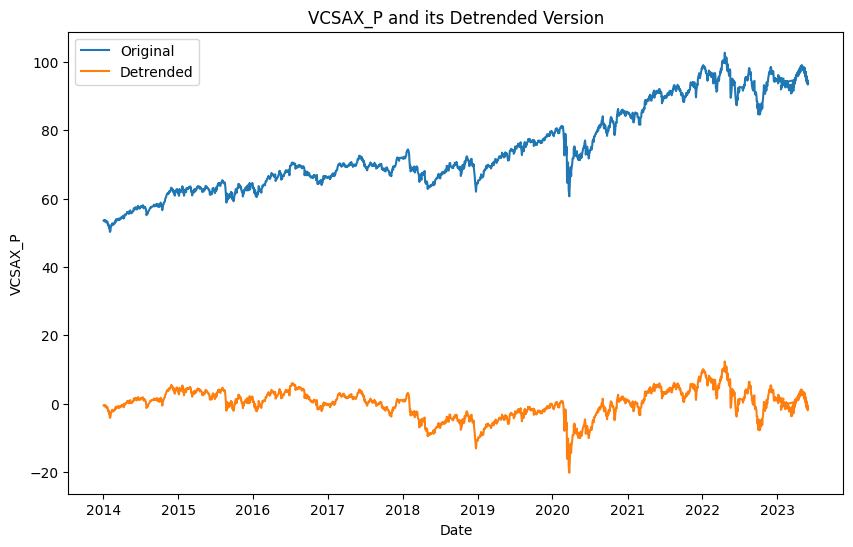

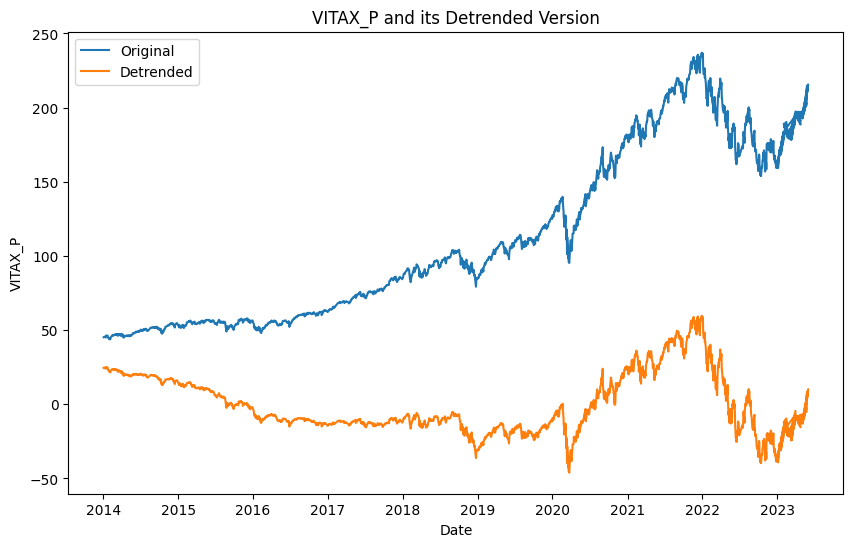

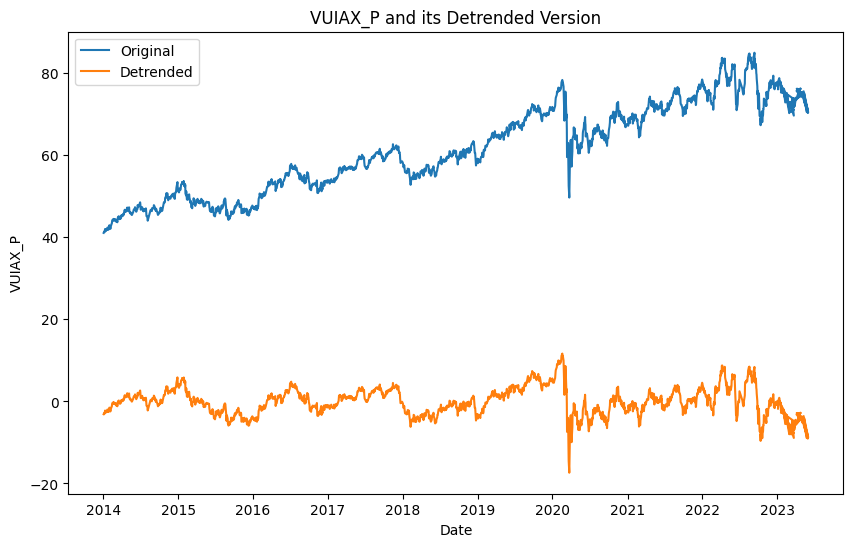

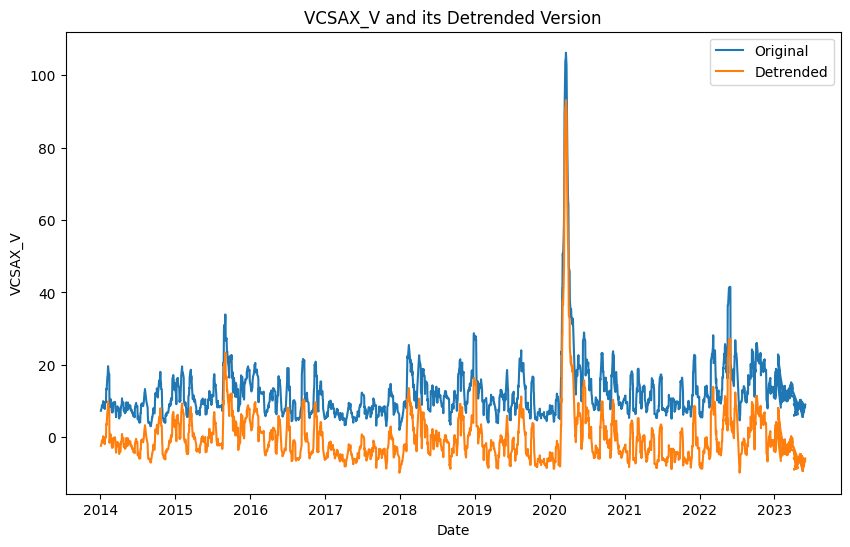

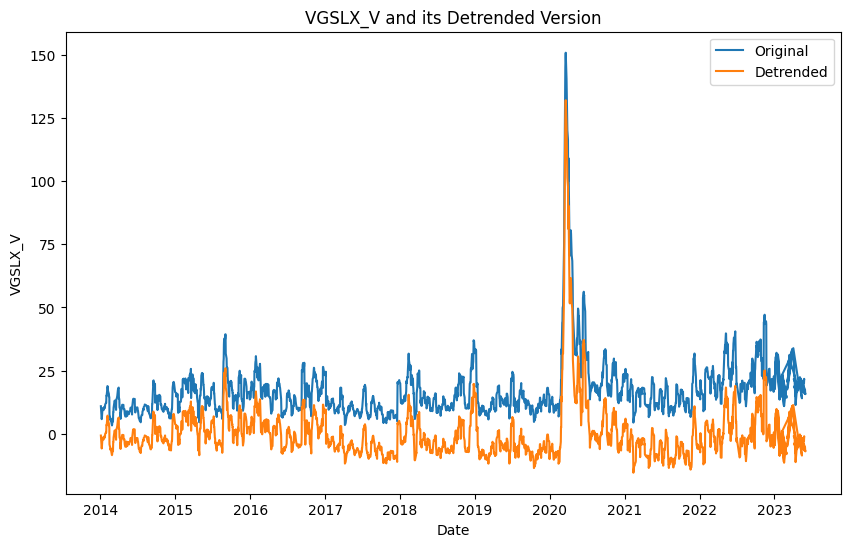

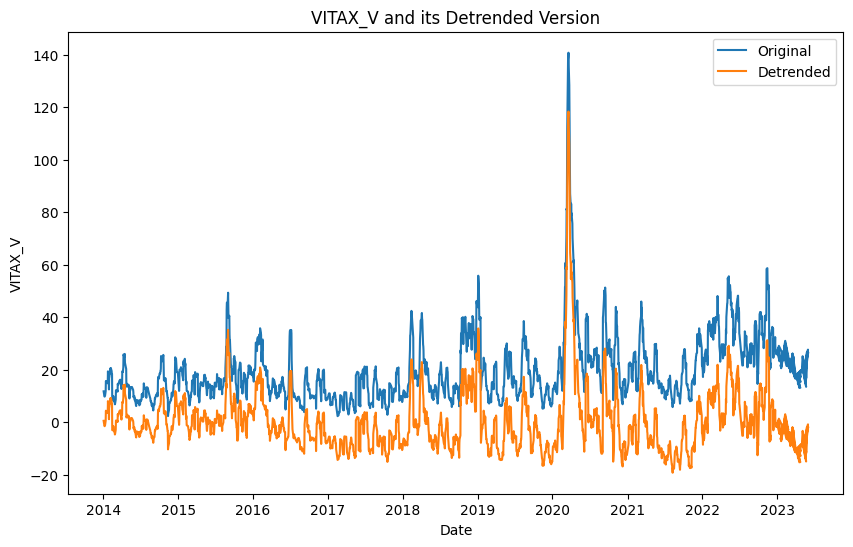

            VCSAX_P  VITAX_P  VUIAX_P  VCSAX_V  VGSLX_V  VITAX_V
date                                                            
2014-01-03    53.60    45.23    41.06    7.334   10.956   11.764
2014-01-07    53.69    45.56    41.45    8.179    5.849    9.795
2014-01-08    53.33    45.62    41.24    8.861    6.434    9.737
2014-01-10    53.61    45.48    42.01    8.734    9.053   10.120
2014-01-13    53.23    44.96    41.61    8.942   10.224   11.828
...             ...      ...      ...      ...      ...      ...
2023-05-17    97.24   201.86    72.47    7.910   21.004   17.232
2023-05-24    94.54   201.57    71.48    8.190   19.947   17.235
2023-05-25    94.08   208.78    70.51    7.004   19.946   24.413
2023-05-26    94.29   214.30    70.56    7.982   21.789   26.673
2023-05-19    97.01   205.42    72.07    5.742   18.129   15.141

[2182 rows x 6 columns]
            VCSAX_P_detrended  VITAX_P_detrended  VUIAX_P_detrended  \
date                                                       

In [123]:
for column in data_affected:
    detrended_column = detrend_linear(data_affected[column])
    data_detrended[column + '_detrended'] = detrended_column

    plt.figure(figsize=(10, 6))
    plt.plot(data_affected[column], label='Original')
    plt.plot(detrended_column, label='Detrended')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} and its Detrended Version')
    plt.legend()
    plt.show()

print(data_affected)
print(data_detrended)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

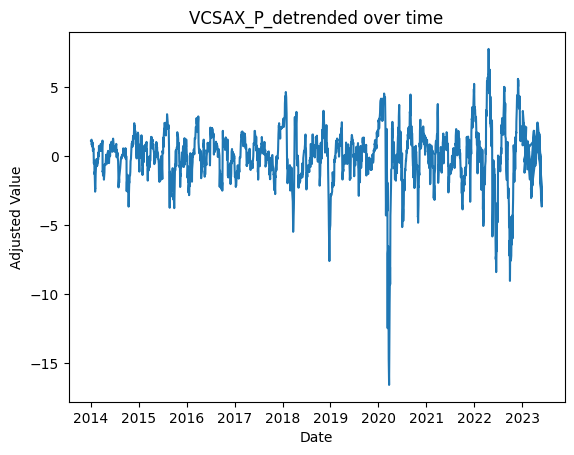

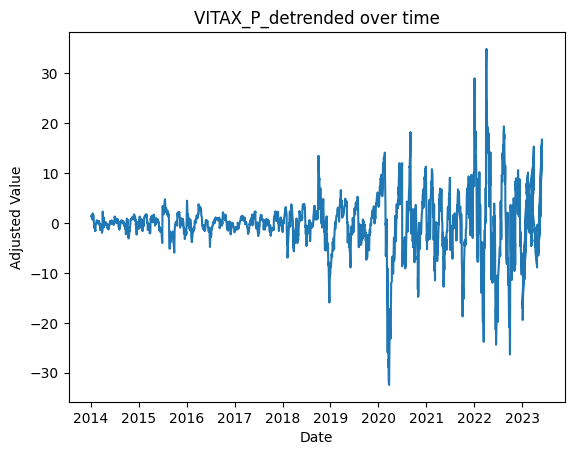

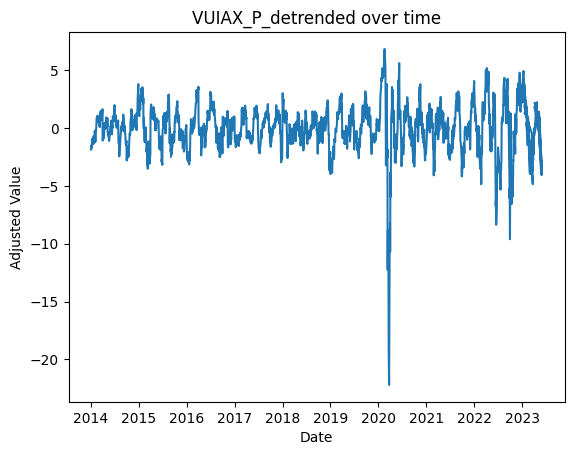

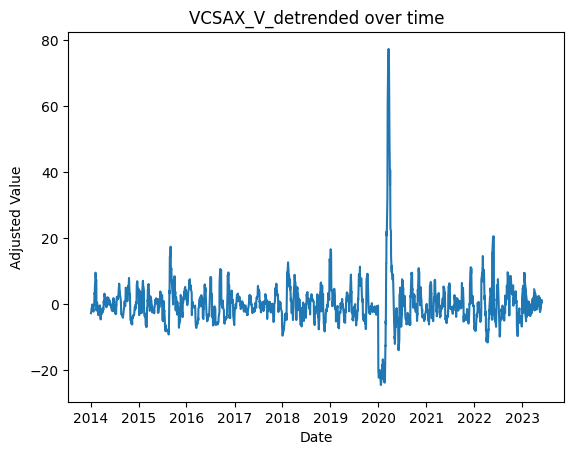

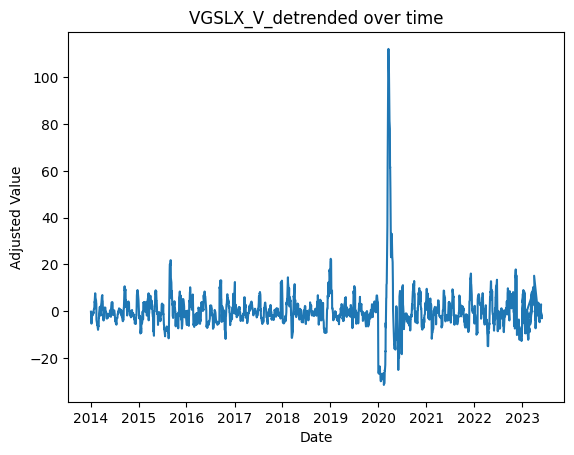

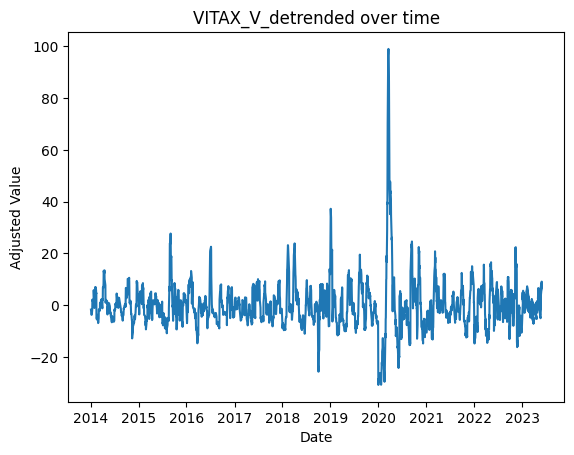

In [124]:
data_seasonal = data_detrended.copy()

season_mapping = {
    1: 'winter',
    2: 'winter',
    3: 'winter',
    4: 'spring',
    5: 'spring',
    6: 'spring',
    7: 'summer',
    8: 'summer',
    9: 'summer',
    10: 'fall',
    11: 'fall',
    12: 'fall'
}

data_seasonal['season'] = data_seasonal.index.month.map(season_mapping)
data_seasonal['year'] = data_seasonal.index.year

detrend_seasonal = lambda column: column - data_seasonal.groupby(['year', 'season'])[column.name].transform('mean')

columns_to_detrend = data_seasonal.columns.difference(['date', 'season', 'year'])
data_seasonal[columns_to_detrend] = data_seasonal[columns_to_detrend].apply(detrend_seasonal)

data_seasonal.to_csv('detrended_final.csv', index=True)
files.download('detrended_final.csv')

for column in data_seasonal.columns:
    if column not in ['season', 'year']:
        plt.figure()
        plt.plot(data_seasonal.index, data_seasonal[column])
        plt.title(f'{column} over time')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Value')
        plt.show()
